## Reading the files

In [3]:
# import gzip
# with gzip.open('ca-GrQc.txt.gz', 'rb') as f:
#     file_content = f.read()



In [4]:
# with open("ca-GrQc.txt",'wb') as f:
#     f.write(file_content)

## Imports

In [1]:
import pandas as pd

### [2 points] Represent the network in terms of its ‘adjacency matrix’ as well as ‘edge list’.

In [2]:
with open("ca-GrQc.txt","r") as f:
    lines = f.read().splitlines()

#### Constructing the edge list

In [3]:
print("Info about graph")

for line in lines[:3]:
    print(line)
    print("\n")

Info about graph
# Directed graph (each unordered pair of nodes is saved once): CA-GrQc.txt 


# Collaboration network of Arxiv General Relativity category (there is an edge if authors coauthored at least one paper)


# Nodes: 5242 Edges: 28980




In [4]:
edges = lines[4:] #edges

In [5]:
edge_list = dict() #node : [list of connected nodes]

for edge in edges:
    node1,node2 = edge.split('\t')
    
    if node1 not in edge_list:
        edge_list[node1] = [node2]
    else:
        edge_list[node1].append(node2)
    

In [6]:
edge_list

{'3466': ['937', '5233', '8579', '10310', '15931', '17038', '18720', '19607'],
 '10310': ['1854',
  '3466',
  '4583',
  '5233',
  '9572',
  '10841',
  '13056',
  '14982',
  '16310',
  '19640',
  '23855',
  '24372',
  '24814'],
 '5052': ['899',
  '1796',
  '2287',
  '3096',
  '3386',
  '4472',
  '5346',
  '5740',
  '6094',
  '6376',
  '9124',
  '10235',
  '10427',
  '10597',
  '15159',
  '16148',
  '16741',
  '18235',
  '18549',
  '19297',
  '20511',
  '20595',
  '20613',
  '24371',
  '24559',
  '24731',
  '25102',
  '25271',
  '25396'],
 '5346': ['1658',
  '4822',
  '5052',
  '6864',
  '7689',
  '7926',
  '9124',
  '10268',
  '12971',
  '15159',
  '18600',
  '20421',
  '20886',
  '21048',
  '22393',
  '23186',
  '23214',
  '23298',
  '23945',
  '24939'],
 '15159': ['5052', '5346', '20421', '22393'],
 '19640': ['339',
  '624',
  '3731',
  '4743',
  '5407',
  '6610',
  '6700',
  '8045',
  '9099',
  '9639',
  '9785',
  '10310',
  '12141',
  '15184',
  '15784',
  '18719',
  '19870',
  '205

In [7]:
len(edge_list) # hence verfied as nos of nodes in edge list is same as in the graph

5242

In [8]:
sum(len(val) for val in edge_list.values()) #Since it is a directed graph, there as many number of edges in edge list as in the graph

28980

### Constructing Adjacency matrix

In [9]:
adj_matrix = pd.DataFrame(columns=edge_list.keys(),index=edge_list.keys()).fillna(0)

In [10]:
for node in edge_list:
    for adj_node in edge_list[node]:
        adj_matrix.loc[node,adj_node] = 1

In [11]:
adj_matrix

,3466,10310,5052,5346,15159,19640,10243,18648,16470,17822,...,16590,16730,19957,21848,22320,5774,4836,17464,10154,11113
3466,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10310,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5052,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5346,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15159,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### [28 points] Briefly describe the dataset chosen and report the following:

Description of data set : https://snap.stanford.edu/data/ca-GrQc.html

1. Number of Nodes

In [12]:
print("Nos of nodes in the graph",len(edge_list))

Nos of nodes in the graph 5242


2. Number of Edges

In [13]:
print("Number of edges in the graph")
sum(len(val) for val in edge_list.values()) #Since it is a directed graph, there as many number of edges in edge list as in the graph

Number of edges in the graph


28980

3. Avg In-degree

In [14]:
nos_of_nodes = len(edge_list)

In [19]:
sum_of_inc_degree = 0

#take sum of column, since df[row][col] indicates edge from row->col
for node in adj_matrix.columns:
    sum_of_inc_degree += sum(adj_matrix[node])

avg_in_deg = sum_of_inc_degree/nos_of_nodes

In [20]:
avg_in_deg

5.528424265547501

4. Avg. Out-Degree

In [21]:
sum_of_out_degree = 0

#take sum of row , since df[row][col] indicates edge from row->col
for node in adj_matrix.index:
    sum_of_out_degree += sum(adj_matrix.loc[node])

avg_out_deg = sum_of_out_degree/nos_of_nodes

In [22]:
avg_out_deg

5.528424265547501

As the graph is undirected hence it has the same avg indegree and avg outdegree

5. Node with Max In-degree

In [23]:
max_in_degree = 0
res_node = -1

for node in adj_matrix.columns:
    in_degree_of_node = sum(adj_matrix[node])
    
    if max_in_degree<in_degree_of_node:
        max_in_degree = in_degree_of_node
        res_node = node
    

print(f"The node {res_node} has the max_in_degree of {max_in_degree}")

The node 21012 has the max_in_degree of 81


6. Node with Max out-degree

In [25]:
max_out_degree = 0
res_node = -1

#df[row][col] indicates edge from row->col
for node in adj_matrix.index:
    out_degree_of_node = sum(adj_matrix.loc[node])
    if out_degree_of_node>max_out_degree:
        max_out_degree = out_degree_of_node
        res_node = node
    

print(f"The node {res_node} has the max out degree of {max_out_degree}")
    

The node 21012 has the max out degree of 81


#### Since the graph is undirected hence it is same

7. The density of the network

In [29]:

nos_of_edges = sum(adj_matrix.apply(pd.value_counts).loc[1].values)

In [31]:
nos_of_edges = nos_of_edges/2 #since undirected

In [32]:
potential_edges = (nos_of_nodes*(nos_of_nodes-1))/2

In [33]:
density = nos_of_edges/potential_edges

In [34]:
print(f"The density of the network is {density}")

The density of the network is 0.0010548414931401452


### Further, perform the following tasks:
1. [5 points] Plot degree distribution of the network (in case of a directed graph, plot in-degree and
out-degree separately).
2. [10 points] Calculate the local clustering coefficient of each node and plot the clustering-coefficient
distribution (lcc vs frequency of lcc) of the network.

### Degree distribuition of the graph

In [39]:
import matplotlib.pyplot as plt

In [36]:
## make a list of degree of each node

degree = []

for node in adj_matrix.columns:
    degree_of_node = sum(adj_matrix[node])
    
    degree.append(degree_of_node)

In [42]:
nodes = list(adj_matrix.columns.values)

In [45]:
len(degree)

5242

In [46]:
len(nodes)

5242

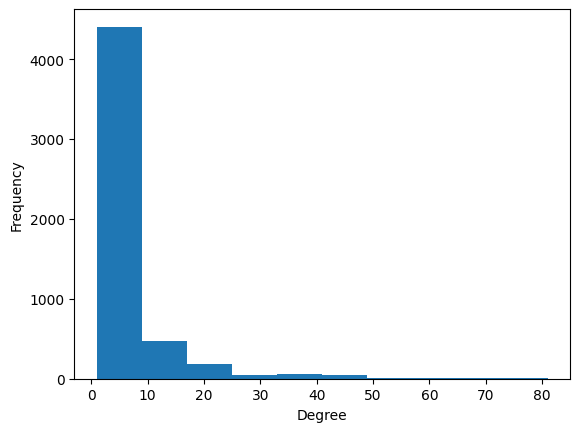

<Figure size 1200x800 with 0 Axes>

In [54]:
plt.hist(degree)

plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.figure(figsize=(12,8))
plt.show()

[10 points] Calculate the local clustering coefficient of each node and plot the clustering-coefficient distribution (lcc vs frequency of lcc) of the network.

In [57]:
edge_list

{'3466': ['937', '5233', '8579', '10310', '15931', '17038', '18720', '19607'],
 '10310': ['1854',
  '3466',
  '4583',
  '5233',
  '9572',
  '10841',
  '13056',
  '14982',
  '16310',
  '19640',
  '23855',
  '24372',
  '24814'],
 '5052': ['899',
  '1796',
  '2287',
  '3096',
  '3386',
  '4472',
  '5346',
  '5740',
  '6094',
  '6376',
  '9124',
  '10235',
  '10427',
  '10597',
  '15159',
  '16148',
  '16741',
  '18235',
  '18549',
  '19297',
  '20511',
  '20595',
  '20613',
  '24371',
  '24559',
  '24731',
  '25102',
  '25271',
  '25396'],
 '5346': ['1658',
  '4822',
  '5052',
  '6864',
  '7689',
  '7926',
  '9124',
  '10268',
  '12971',
  '15159',
  '18600',
  '20421',
  '20886',
  '21048',
  '22393',
  '23186',
  '23214',
  '23298',
  '23945',
  '24939'],
 '15159': ['5052', '5346', '20421', '22393'],
 '19640': ['339',
  '624',
  '3731',
  '4743',
  '5407',
  '6610',
  '6700',
  '8045',
  '9099',
  '9639',
  '9785',
  '10310',
  '12141',
  '15184',
  '15784',
  '18719',
  '19870',
  '205

In [60]:
lc_list = []
for node in edge_list:
    neighbors = edge_list[node]
    
    k = len(neighbors) #nos of neighbors of node
    
    if k<2:
        #node has 0 or 1 degree
        lc_list.append(0)
        continue
        
    count_of_edges = 0
    
    for neigh1 in neighbors:
        for neigh2 in neighbors:    
            if neigh1!=neigh2:
                #check if edge between neigh1 and neigh2
                if neigh2 in edge_list[neigh1]:
                    count_of_edges = count_of_edges + 1 #note since we are checking every edge, this will count each edge twice hence no need to multiply by 2
    
    potential_edges = k*(k-1)
    
    lc = count_of_edges/potential_edges
    lc_list.append(lc)
    
    
                
                

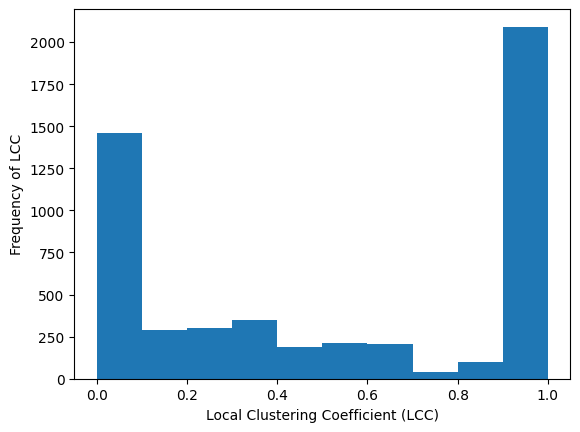

<Figure size 1200x800 with 0 Axes>

In [62]:
plt.hist(lc_list)

plt.xlabel("Local Clustering Coefficient (LCC)")
plt.ylabel("Frequency of LCC")
plt.figure(figsize=(12,8))
plt.show()